# Result Visualizations

In [5]:
from results_visualization import *

This notebook is based on the APIs in results_visualization.py. If need details, plz check it out. The hyper-params about the simulation work for visualization is also defined inside as below shows.

```
BATCH_SIZE = 64

NEURON_NUM = 500

EXC_NUM = 400

DT = 2

MS = 0.001

TRIAL_TIME = {
    'fixation': 200,
    'cueing': 100,
    'cueing_delay': 400,
    'stimuls': 100
}

DELAY_START = int((TRIAL_TIME['fixation'] + TRIAL_TIME['cueing']) / DT) 

DELAY_END = DELAY_START + int(TRIAL_TIME['cueing_delay'] / DT)

```

In [36]:
tiral_results = ResultsVisualization(path='snn_PFC_log/your_data_dir_path',
                                     bin_size=4, min_len=50, pca_bin_size=10)

The whole visualization work is packed into object `ResultsVisualization`. 
When init its instance `tiral_results`, as for args
- `path` is the dir path of the saved recordings
- `bin_size` is the default bin size for computing firing rate in all visualization work
- `min_len` is the num of trails for two kinds of final choices (left/right) in two cueing rules (attend to audition/vision). Its default value is 50, which means the total num of trials is 50*4=200
- `pca_bin_size` is the bin size for computing firing rate when generating corresponding PCAs

## Testing Analysis

In [37]:
tiral_results.get_base_analysis(if_all_pcas=False, if_all_trial=False)

Analysis: snn_PFC_log/20210313-051012/base_
All Accuracy:  0.996875
Visualize correct  638  cases in  640


`get_base_analysis` is to read the recordings of the default (base) testing results of the corresponding model without any perturbation. The results will be packed into the instance of object `AnalysisCollection`, which also is one attribute of `ResultsVisualization`.  As for args, `if_all_pcas` means if generate PCAs for every single trials. `if_all_trial` means if ignore the value `min_len` in`ResultsVisualization`. In default, the total num of trials in recording files is much larger than what `min_len` needs, thus the trials for visualization are randomly selected. If `if_all_trial` is true, all trials in recording files will be used.


9.009816311009361 8.73083202445531
Neuron 3 spike samples


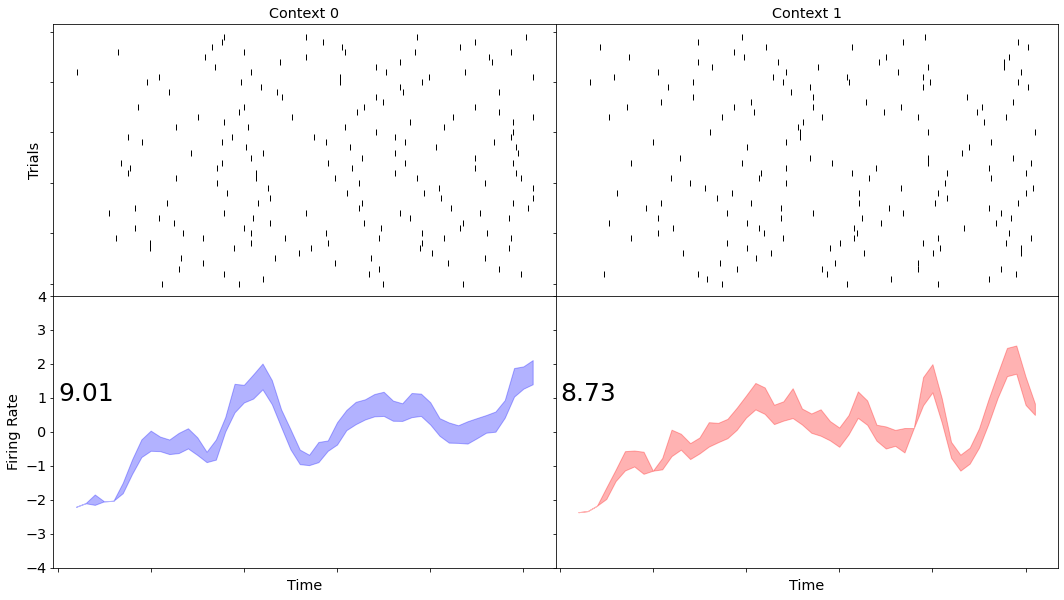

In [58]:
plot_spikes(n_id=3, results=tiral_results.base, bin_size=tiral_results.bin_size, delay_start=DELAY_START, delay_end=DELAY_END,
                width=18, height=10, if_save=False, saved_name='raster.svg')

Function `plot_spikes` plots spike rasters and PSTHs for nuron `n_id` in AnalysisCollection `results` with bin_size `bin_size`. The start/end time is `delay_start` and `delay_end`. `width` and `height` define the size of plot. `if_save` is a bool to decide if save the plot to path `saved_name`.

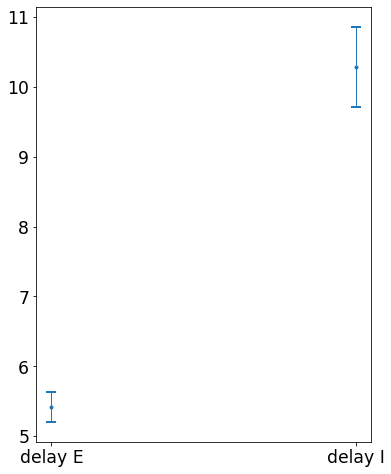

(5.418852459016391,
 10.28625,
 0.21675520865337017,
 0.5741769789228753,
 array([ 1.725,  8.75 ,  1.55 ,  1.925,  1.05 ,  1.025,  7.325, 11.05 ,
         1.125, 10.2  ,  7.75 , 17.9  ,  1.625, 11.975,  1.85 ,  1.1  ,
         8.2  ,  6.575,  0.525,  7.15 ,  5.7  ,  8.325, 15.725,  0.65 ,
         1.35 ,  1.3  ,  1.225, 11.7  ,  1.075, 11.05 ,  4.875,  4.825,
         1.3  ,  4.575,  8.025,  4.075,  6.575,  7.3  ,  7.55 ,  4.275,
         1.2  ,  1.875,  2.675,  4.4  ,  2.775,  9.6  ,  8.65 ,  0.725,
         1.175,  0.575,  2.075,  1.425,  6.25 ,  4.275, 10.375,  0.65 ,
         2.8  ,  0.925, 16.925,  0.9  ,  1.35 ,  1.   ,  0.9  ,  0.6  ,
         4.575, 10.875, 10.675,  0.95 ,  0.575,  1.15 ,  3.825,  5.325,
         1.15 ,  5.7  ,  8.4  , 10.025, 11.1  ,  9.25 ,  0.65 ,  6.425,
         8.525,  3.575,  2.55 ,  1.5  ,  6.775, 13.25 ,  9.1  ,  0.775,
         2.075,  1.125,  8.1  ,  1.65 ,  5.7  ,  1.1  ,  7.7  ,  1.325,
         0.8  ,  5.875,  4.3  , 12.925,  9.4  ,  1.85 ,  1.25 

In [12]:
plot_EI_fr(tiral_results.base, th=0.5, delay_start=DELAY_START, delay_end=DELAY_END, if_plot=True)

Like `plot_spikes`, `plot_EI_fr` computes and plots the information of firing rate for E/I neurons from time `delay_start` to `delay_end`. `th` is the threshold for filter out neurons with very low firing rate. The return values are the mean of E/I neurons, std of E/I neurons, and the specific fr for each neuron.

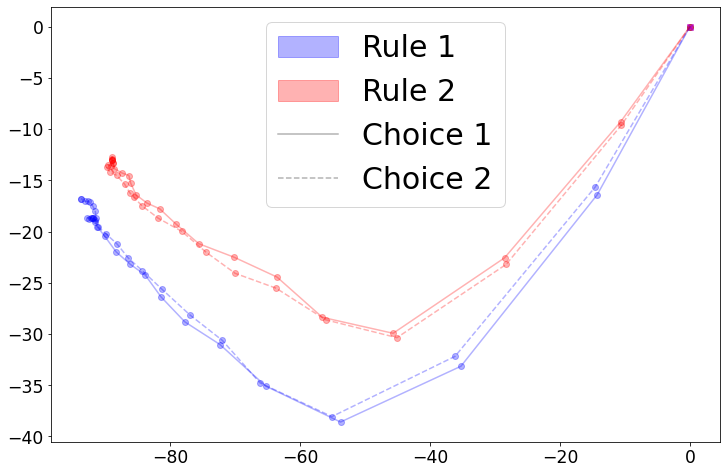

In [33]:
tiral_results.draw_2Dpca(tiral_results.base.pca_projs)

Neural trajectory of 400 excitatory neurons projected onto the PC1 and PC2 subspaces

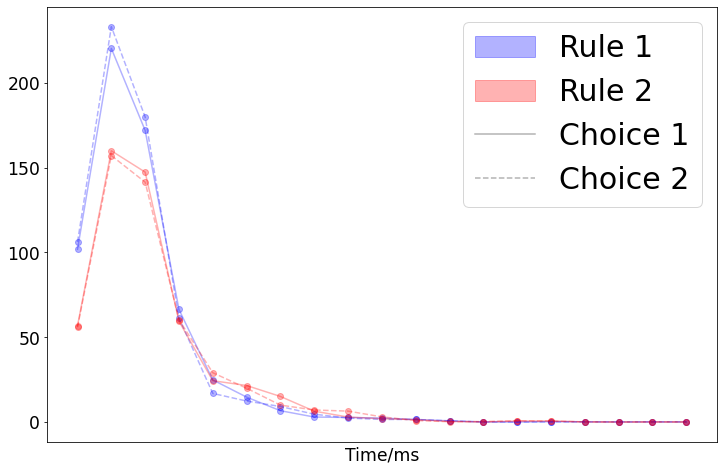

In [32]:
tiral_results.draw_2Dmomen(tiral_results.base.pca_projs)

The curve of kinetic energy computed from PC1

/home/opc/mlenv/lib64/python3.6/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


160
80


/home/opc/disk/Project/SNN_PFC-MD/results_visualization.py:659: RuntimeWarning: invalid value encountered in true_divide
  normed_fr0 = np.array([(f-np.min(f))/(np.max(f)-np.min(f)) for f in trial_fr0])
/home/opc/disk/Project/SNN_PFC-MD/results_visualization.py:660: RuntimeWarning: invalid value encountered in true_divide
  normed_fr1 = np.array([(f-np.min(f))/(np.max(f)-np.min(f)) for f in trial_fr1])


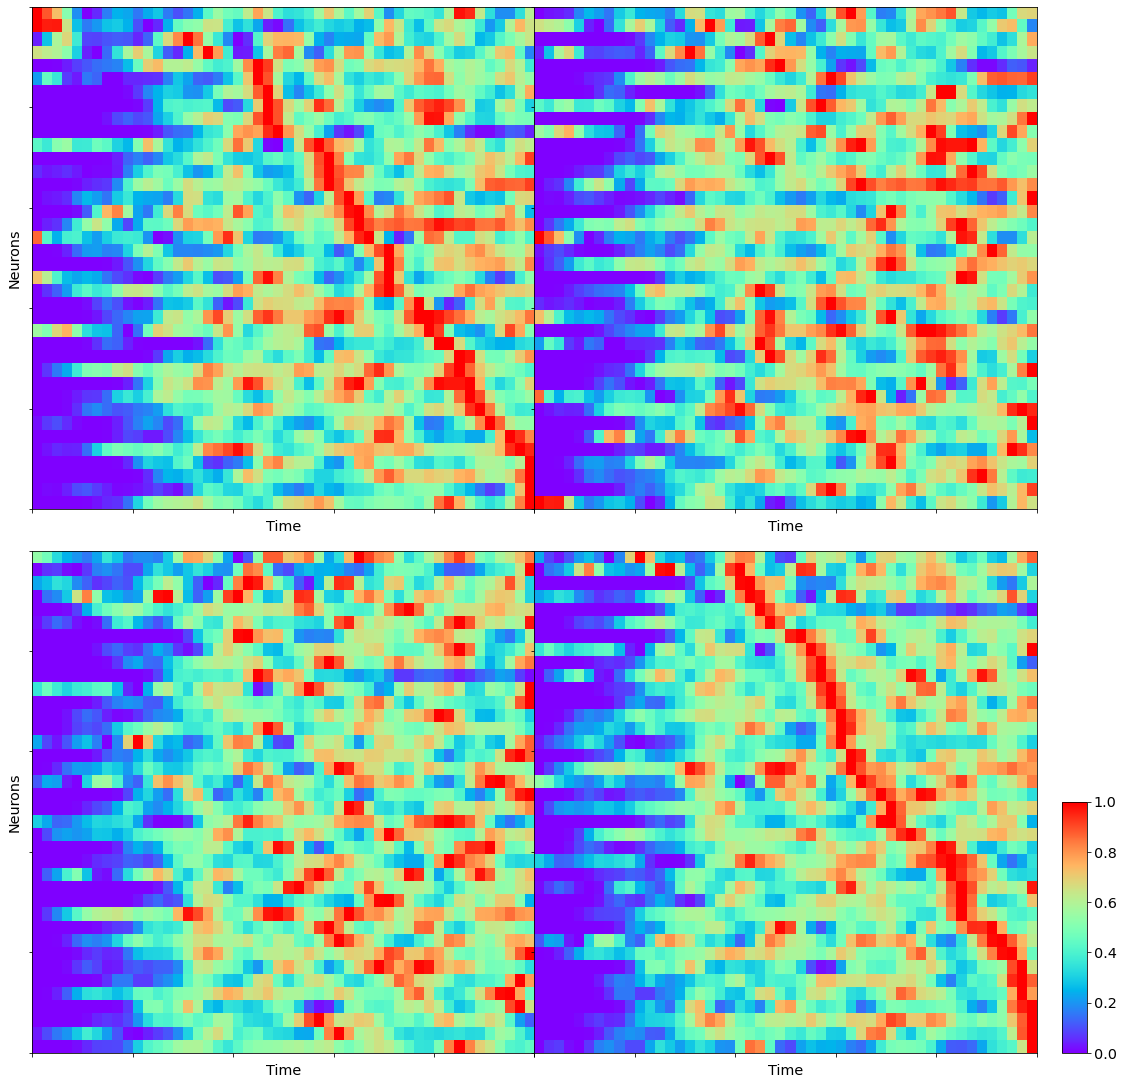

In [40]:
tiral_results.draw_sequence(
    c0_spikes=tiral_results.base.c0_spikes[:EXC_NUM,DELAY_START:DELAY_END].cpu().numpy(),
    c1_spikes=tiral_results.base.c1_spikes[:EXC_NUM,DELAY_START:DELAY_END].cpu().numpy(), 
    fr_th=2., peak_th=2.,if_save=False, saved_name='all_sequence.svg', if_base=True)

Heat maps of normalized task-modulated excitatory neuronal firing rates in delay peroid are plotted by `draw_sequence`. `c0_spikes` and `c1_spikes` is the spikes data under two different cueing rules. `fr_th` defines a firing rate threshold to filter out low firing rate neurons. `peak_th` defines the peak threshold to select the tuned neurons


When drawing PCAs and sequence plot for base testing results, the PCA projector and detected tuned neurons will be saved as attributes in `ResultsVisualization`, which will be used to analyze and compare the model's other perturbation testing.